# CAP 5768 - Data Science - Dr. Marques - Fall 2020

#**Assignment 3 : Statistics and Probability Distributions**

**Name: Ankur Verma**

**Course: CAP 5768 Introduction to Data science**

**Professor: Dr. Oge Marques**

**Date: Oct 23rd, 2020**

Link of Google Colab: https://colab.research.google.com/drive/1ElA3Zv5mswuzWwU5O9lCQIJZKfl335SK?usp=sharing


### Goals 

- To transition from data analytics to basic statistical analysis.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.
- To practice the computation and displaying of representative statistical distributions.
- To compute moments and skewness measures.
- To estimate the parameters of a distribution and propose a model that explains the underlying data.

### Instructions

- This assignment is structured in four parts, each using their own dataset(s).
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 


---------
### Imports + Google Drive

In [206]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import scipy.stats as ss
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [207]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-------------------
## Part 1: The Iris dataset

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

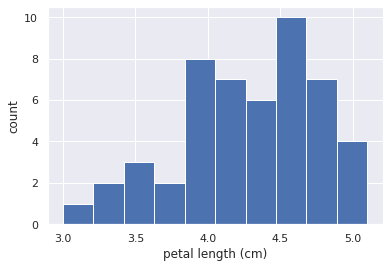

In [209]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

### 1.1 Your turn! (6 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (2 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (2 pts) 

3. Compute summary statistics (1 pt each): mean and standard deviation 

# **Solution 1.1**

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (2 pts)


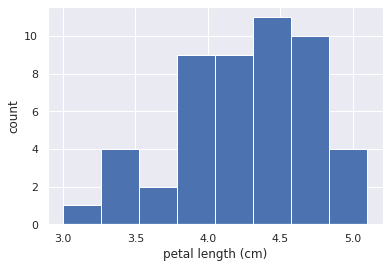

In [210]:
# square root rule function
plt.hist(versicolor_petal_length, bins='sqrt')

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (2 pts) 

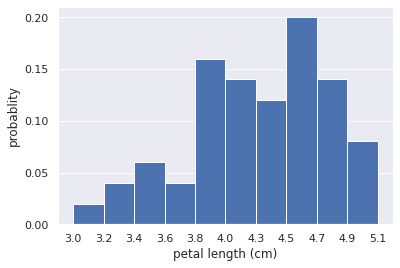

In [211]:
from matplotlib.ticker import StrMethodFormatter

N = len(versicolor_petal_length)
sample_pct = np.ones(N) / N
_, bins, _ = plt.hist(versicolor_petal_length, weights=sample_pct)
plt.xlabel('petal length (cm)')
plt.ylabel('probablity')
ax = plt.gca()
ax.set_yticks(ax.get_yticks()[::2])
ax.xaxis.grid(False)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
plt.xticks(bins);

3. Compute summary statistics (1 pt each): mean and standard deviation



In [212]:
#Mean and Standard Deviation for Versicolor Dataset
print('Vesricolor mean = ',versicolor_petal_length.mean(), 'Versicolor Standard deviation =', versicolor_petal_length.std())


Vesricolor mean =  4.26 Versicolor Standard deviation = 0.46991097723995806


In [213]:
#Mean and Standard Deviation for Whole Iris Dataset
print('Whole Iris dataset mean = ',iris.mean(),
      'Whole Iris dataset Standard deviation =', iris.std())


Whole Iris dataset mean =  sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64 Whole Iris dataset Standard deviation = sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


### 1.2 Your turn! (3 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 

Your plot should look like this:

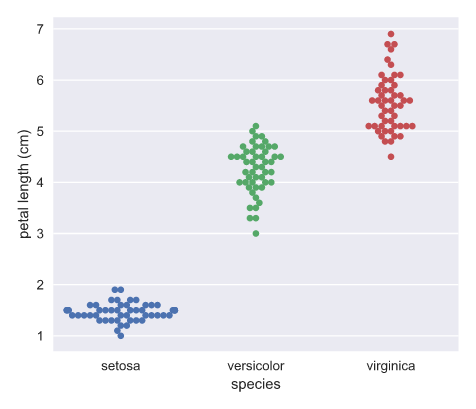


# **Solution 1.2**



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


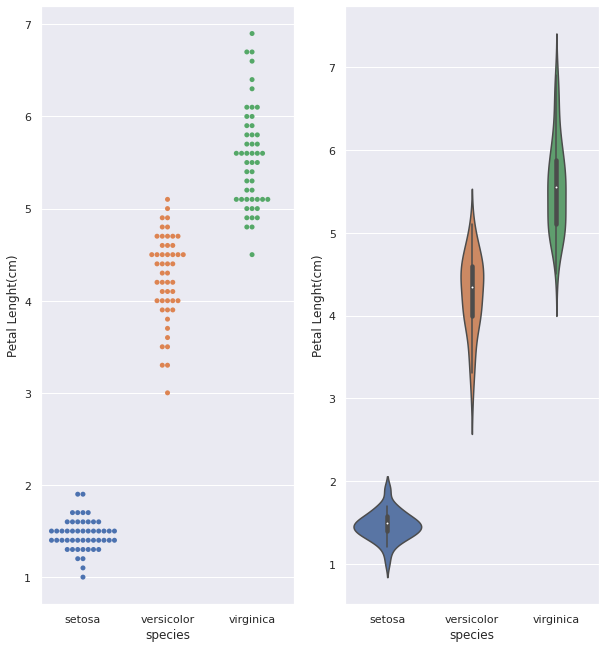

In [214]:
# Enter your code here
#for swam plot and violin plot following codes need to use
plt.figure(figsize=(10,11))
plt.subplot(121)
ax = sns.swarmplot('species','petal_length',data= iris)
ax.set_ylabel('Petal Lenght(cm)')
plt.subplot(122)
ay = sns.violinplot('species','petal_length',data= iris)
ay.set_ylabel('Petal Lenght(cm)')
plt.show()


### Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [215]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### 1.3 Your turn! (6 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (3 pts) and plot the resulting ECDF (3 pts).

Your plot should look like this:

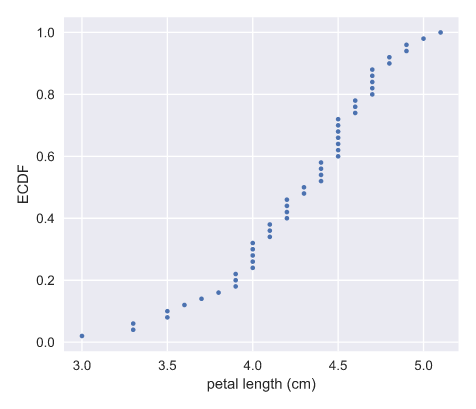

## **Solution 1.3**

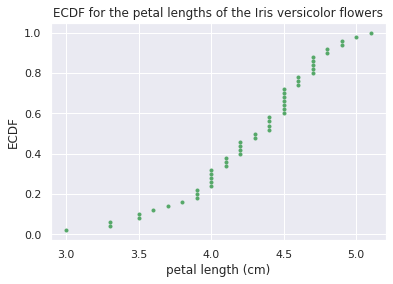

In [216]:
# Enter your code here

x, y = ecdf(versicolor_petal_length)
plt.scatter(x, y, marker='.',color="g")
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.title ('ECDF for the petal lengths of the Iris versicolor flowers')
plt.show()

### 1.4 Your turn! (4 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

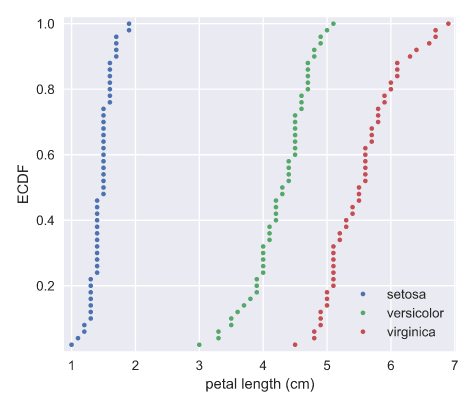

# **Solution 1.4**

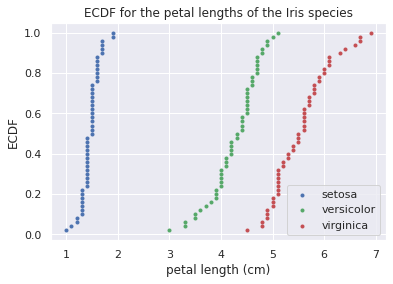

In [217]:
# Enter your code here

def plot_iris_ecdf(show_percentiles=False):
  species = iris.species.unique()
  colors = ['b', 'g', 'r']

  for s, c in zip(species, colors):
    petal_length = iris[iris.species == s].petal_length
    x, y = ecdf(petal_length)
    plt.scatter(x, y, marker='.', label=s, color=c)

    if show_percentiles:
          percentiles = np.array([25, 50, 75])
          p = np.percentile(petal_length, np.array([25, 50, 75]))
          plt.plot(p, percentiles/100, marker='D', color='red',
              linestyle='none')
  plt.xlabel('petal length (cm)')
  plt.ylabel('ECDF')
  plt.legend()
  plt.title ('ECDF for the petal lengths of the Iris species')

plot_iris_ecdf()


### Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

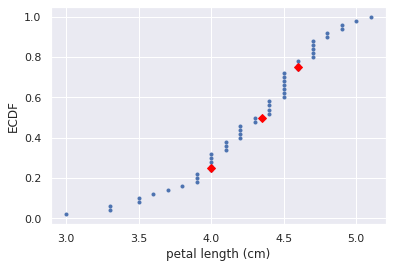

In [ ]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### 1.5 Your turn! (5 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.

# **Solution** 1.5

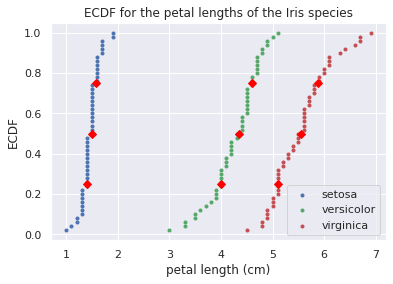

In [220]:
# Enter your code here

plot_iris_ecdf(True)

### Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

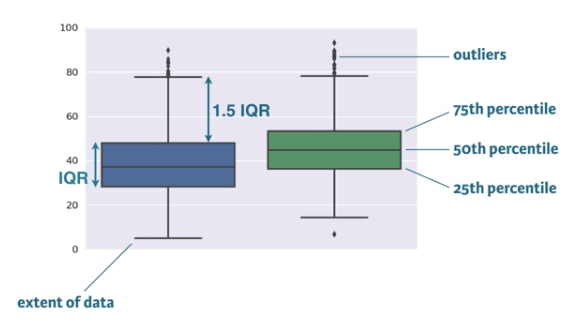


### 1.6 Your turn! (5 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

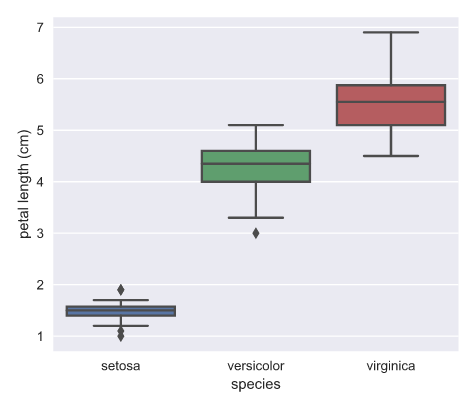

# **Solution 1.6**

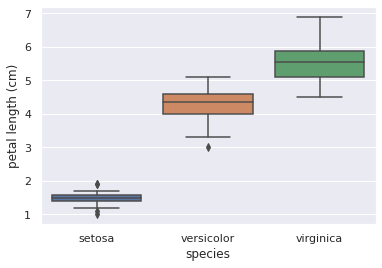

In [221]:
# Enter your code here
ax = sns.boxplot(x='species', y='petal_length', data=iris)
ax.set_ylabel('petal length (cm)');

### 1.7 Bonus! (5 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

# **Solution 1.7 (BONUS)**

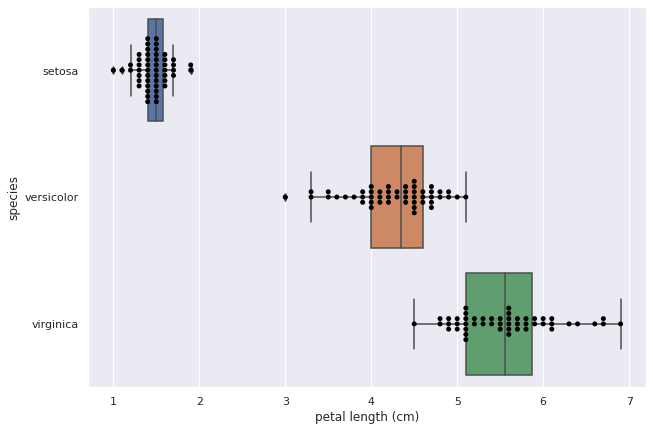

In [222]:
# Enter your code here
plt.figure(figsize=(10,7))
sns.boxplot(x='petal_length', y='species', data=iris)
sns.swarmplot(x='petal_length', y='species', data=iris, color='black' )
plt.xlabel('petal length (cm)');

### Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


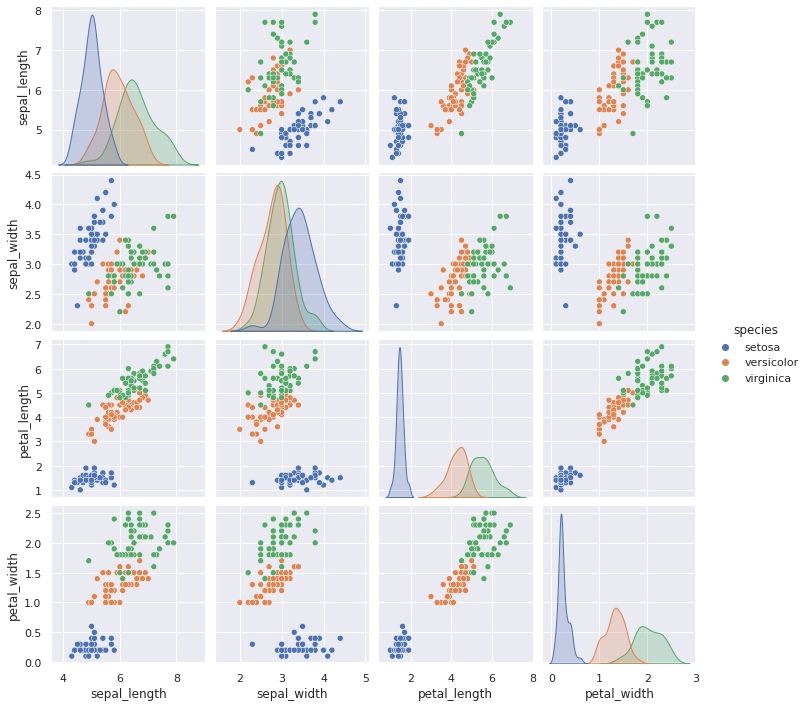

In [223]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

### 1.8 Bonus! (5 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.  

In [ ]:
# Enter your code here
# ...

-------------------
## Part 2: Empirical distributions vs. analytic distributions

### Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

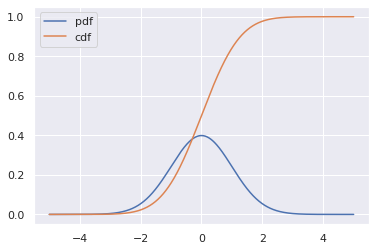

In [224]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

### 2.1 Your turn! (6 points, i.e., 3 pts each)

Write code to:

1. Plot the PDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot. 
They will probably look like this:

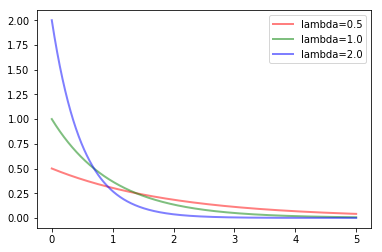

2. Plot the CDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.

They will probably look like this:

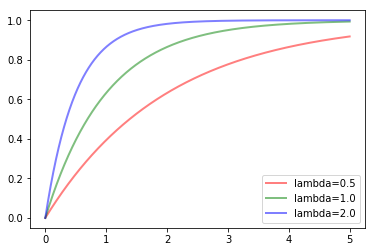

##**Solution 2.1.1 Plot PDF**

In [225]:
lambda_to_plot = (0.5, 1.0, 2.0)
lambda_color = dict(zip(lambda_to_plot, ('r', 'g', 'b')))


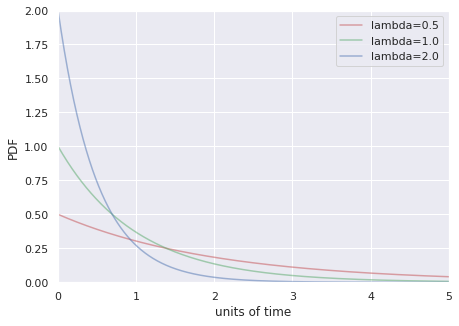

In [226]:
plt.figure(figsize=(7,5))
for lam in lambda_to_plot:
    plot_exponential(lam, ss.expon.pdf, 'PDF', plt.gca())

plt.legend()
plt.show()

##**Solution 2.1.2 Plot CDF**

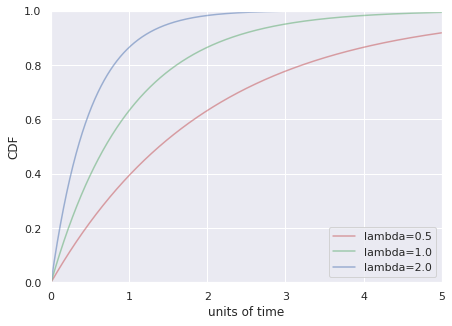

In [227]:
plt.figure(figsize=(7,5))
for lam in lambda_to_plot:
    plot_exponential(lam, ss.expon.cdf, 'CDF', plt.gca(), ylim=(0,1))

plt.legend()
plt.show()

### How well can we model empirical distributions with analytic distributions?

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

*For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page.* (The file ``belmont.csv`` is available on Canvas, if you want to learn more about the race's results.)

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

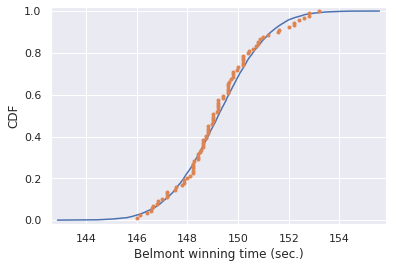

In [228]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### 2.2 Bonus! (10 points)

Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

Instructions:
- Take 1,000,000 samples from the normal distribution using the ``np.random.normal()`` function.
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``belmont_no_outliers`` array. 
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.


# **Solution 2.2**

In [229]:
# Enter your code here
# ...

mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

In [230]:
np.random.seed(seed=398)

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1_000_000)

# Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds: prob
prob = np.sum(samples <= 144)


# Print the result
print(f'Probability of besting Secretariat: {prob}',prob/len(samples))

Probability of besting Secretariat: 643 0.000643


### 2.3 Your turn (15 points)

Let's investigate whether the speed of light measurements by Michelson are normally distributed.

The dataset (``michelson_speed_of_light.csv``) is available on Canvas. 

_Hint_: You are only interested in the *velocity of light in air (km/s)* column.

You should follow a similar sequence of steps as above, namely:
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``michelson_speed_of_light`` array. 
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
- Plot the CDF of your samples with the ECDF, with labeled axes.

For more on Michelson: https://en.wikipedia.org/wiki/Albert_A._Michelson

# **Solution 2.3**

### 2.3.1 Read the data

In [231]:
df=pd.read_csv('/content/drive/My Drive/michelson_speed_of_light.csv')
df.head(5)

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


The data we want to use for further analysis 

In [232]:
m_v = df['velocity of light in air (km/s)'] 
m_v.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

### **2.3.2 Compute the mean mu and standard deviation sigma from the michelson_speed_of_light array.**

In [233]:
mu = np.mean(m_v)
sigma = np.std(m_v)
print('mu =',mu,'\n',
      'sigma = ',sigma )

mu = 299852.4 
 sigma =  78.61450247886843


**2.3.3 Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal()**

In [234]:
 samples = np.random.normal(mu, sigma, 10_000)
 print('Simulation mu={:.2f}, sigma={:.2f}'.format(np.mean(samples), np.std(samples)))

Simulation mu=299852.85, sigma=78.66


**2.3.4 Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to x_theor, y_theor and x, y, respectively.**

In [235]:
x_theor, y_theor = ecdf(samples)
x, y = ecdf(m_v)
x,y

(array([299620, 299650, 299720, 299720, 299720, 299740, 299740, 299740,
        299750, 299760, 299760, 299760, 299760, 299760, 299770, 299780,
        299780, 299790, 299790, 299790, 299800, 299800, 299800, 299800,
        299800, 299810, 299810, 299810, 299810, 299810, 299810, 299810,
        299810, 299810, 299810, 299820, 299820, 299830, 299830, 299840,
        299840, 299840, 299840, 299840, 299840, 299840, 299840, 299850,
        299850, 299850, 299850, 299850, 299850, 299850, 299850, 299860,
        299860, 299860, 299870, 299870, 299870, 299870, 299880, 299880,
        299880, 299880, 299880, 299880, 299880, 299880, 299880, 299880,
        299890, 299890, 299890, 299900, 299900, 299910, 299910, 299920,
        299930, 299930, 299940, 299940, 299940, 299950, 299950, 299950,
        299960, 299960, 299960, 299960, 299970, 299980, 299980, 299980,
        300000, 300000, 300000, 300070]),
 array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 

### **2.3.5 Plot the CDF of your samples with the ECDF, with labeled axes.**

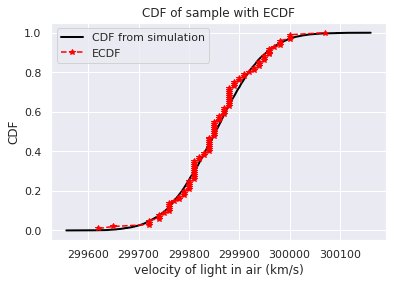

In [236]:
plt.plot(x_theor, y_theor, label='CDF from simulation',lw =2,color = 'black') 
plt.plot(x, y, marker='*', linestyle='--', label='ECDF',color = 'red')
plt.xlabel('velocity of light in air (km/s)') 
plt.title('CDF of sample with ECDF')
plt.ylabel('CDF')
plt.legend()
plt.show()

------
## Part 3: Events over time

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from ``babies_brisbane.csv`` containing information about the time of birth for  44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper. 



### 3.1: Your turn! (15 points)

You should write code to:
1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution (call this ``lam``, since ``lambda`` is a reserved word in Python).
3. Take 10,000 samples out of an exponential distribution with this scale using
``np.random.exponential()``.
4. Compute the CDF of the theoretical samples and the ECDF of the sample data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
5. Plot the CDF of your samples with the ECDF, with labeled axes.
6. Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale. 

# **Solution 3.1.1** Read the data

In [237]:
Babies=pd.read_csv('/content/drive/My Drive/babies_brisbane.csv')
Babies.head(5)

,Unnamed: 0,time,sex,weight_g,minutes
0,0,5,1,3837,5
1,1,104,1,3334,64
2,2,118,2,3554,78
3,3,155,2,3838,115
4,4,257,2,3625,177


# **Solution 3.1.2** Compute mean



In [238]:
births_interarrival = Babies.minutes.diff()
lam = 1 / np.mean(births_interarrival)
print('Dataset lambda, mean=',(lam, np.mean(births_interarrival)))

Dataset lambda, mean= (0.03006993006993007, 33.25581395348837)


# **Solution 3.1.3** 10,000 sample out of exponantial distribution

In [239]:
samples = np.random.exponential(1/lam, 10_000)
print('Simulated sample lambda and mean = ',(1/np.mean(samples), np.mean(samples)))

Simulated sample lambda and mean =  (0.029715558526951832, 33.652404651691334)


# **Solution 3.1.4 to 3.1.6** compute CDF and ECDF, CCDF

In [240]:
x_theor, y_theor = ecdf(samples)
x, y = ecdf(births_interarrival)

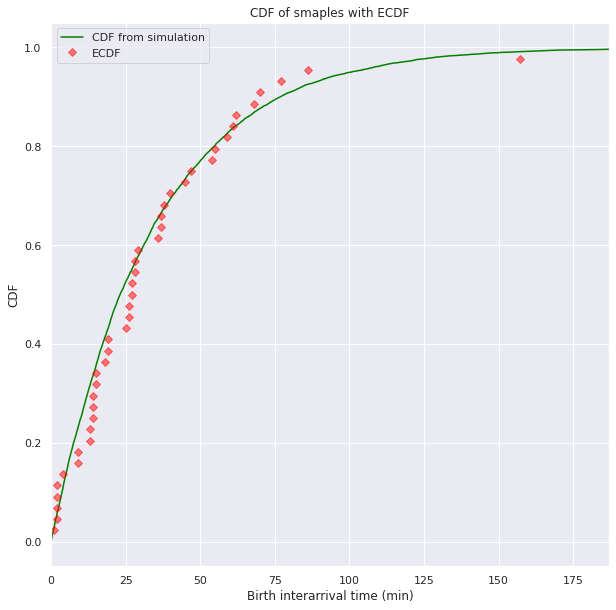

In [241]:
plt.figure(figsize=(10,10))
plt.plot(x_theor, y_theor, label='CDF from simulation',color = 'green')
plt.plot(x, y, marker='D', linestyle='none', label='ECDF', alpha=0.5,color = 'red')
plt.xlim((0, np.max(births_interarrival) + 30))
plt.xlabel('Birth interarrival time (min)')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF of smaples with ECDF')
plt.margins(0.05)
plt.show()

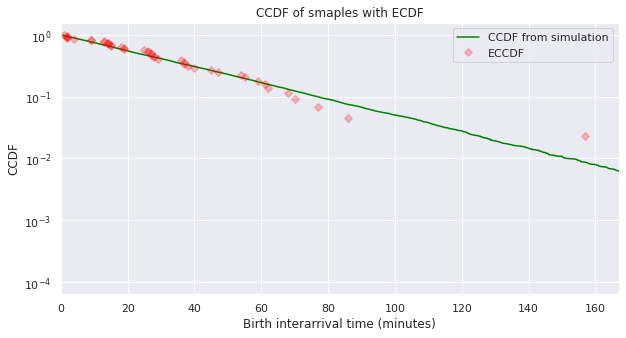

In [242]:
plt.figure(figsize=(10,5))
plt.plot(x_theor, 1-y_theor, label='CCDF from simulation', color = 'green')
plt.plot(x, 1-y, marker='D', linestyle='none', label='ECCDF', alpha=0.25,color = 'red')
plt.yscale('log')
plt.xlim((0, np.max(births_interarrival) + 10))
plt.xlabel('Birth interarrival time (minutes)')
plt.ylabel('CCDF')
plt.title('CCDF of smaples with ECDF')
plt.legend()
plt.margins(0.05)
plt.show()

-------------------
## Part 4: Moments and skewness

Let's revisit the dataset of salaries from Assignment 2 and use it to measure skewness.

### 4.1 Your turn! (10 points)

Write Python code to:
1. Read the `salaries.csv` file, compute the median and mean salary for the entire sample.
2. Compute the first raw moment and show that it is equivalent to computing the mean value.
3. Compute the second central moment and show that it is equivalent to computing the variance.
4. Compute the skewness using ``scipy.stats.skew``

# **Solution** 4.1.1 Read and load the file, compute mean and median

In [243]:
salaries = pd.read_csv('/content/drive/My Drive/salaries.csv')
salaries.head(5)

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [244]:
print ('salaries mean =',salaries['earn'].mean())

salaries mean = 23154.773489932886


In [245]:
print ('salaries median =',salaries['earn'].median())

salaries median = 20000.0


# **Solution 4.1.2** Compute the first Raw moment

In [246]:
def raw_moment(data, k):
    '''Calculate the kth raw moment.'''
    return sum(x**k for x in data) / len(data)

def print_first_raw_moment(data):
    moment = raw_moment(data, 1)
    mean = np.mean(data)

    print('First moment=',(moment))
    print('Mean=',(mean))
    print('First moment == mean:',(np.allclose(moment, mean)))   
print_first_raw_moment(earn)

First moment= 23154.773489932886
Mean= 23154.773489932886
First moment == mean: True


# **Solution 4.1.3** Compute the second central moment and variance

In [247]:
def central_moment(data, k):
    mean = np.mean(data)
    return sum((x - mean)**k for x in data) / len(data)

def print_second_central_moment(data):
    moment = central_moment(data, 2)
    var = np.var(data)

    print('Second central moment: ',(moment))
    print('Variance:',(var))
    print('Second central moment == variance:',(np.allclose(moment, var)))

print_second_central_moment(earn)

Second central moment:  378852251.6248667
Variance: 378852251.6248667
Second central moment == variance: True


# **Solution 4.1.4** Compute the skewness

In [248]:
def print_skewness(data):
    skewness = ss.skew(data)
    print(skewness)

print_skewness(earn)

2.880309741267592


### Questions (9 points, 3 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

3. How do you interpret the value of skewness computed by your code in Part 4?

# Solution

1. **Explain the "binning bias" associated with histogram plots.**

The histogram is an analysis tool for quickly assesing the probability distribution. However, there exists an inherent bias in the choice of binning for the histogram, with diferent choices potentially leading to different interpretations. The binning bias is the significant change in the visualization of a distribution that result from the number of bins used in the histogram.

2. **What is a bee swarm plot and in which situations should you (not) use it?**

Bee swarm plot is used to display the distribution of data points in way to preserve the actual data. beeswarm introduces additional features unavailable in other swarm plot ,such as the ability to control the color and plotting character of each point. Additionally it also allows the visual comparisons of the statistic of the categories like min, max, mean, median and mode.

Bee swarm plot is useful for a small number of data points. where as in case of large number of categories its not useful.

3. **How do you interpret the value of skewness computed by your code in Part 4?**

Usually If the value of skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric.

In case of our code we can interpret the value of skewness is highly skewed becauase its greater than +1.



### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

# **Solution: Conclusion**

### **What have you learned from this assignment?**
**Major concept learn during this assignment:**

* In this assignment i have learn and practice about basic statistical analysis.
* learned about pandas, numpy, seaborne, matplotlib libraries and lost of operations to create meaningful graphs and efficient results.
* How to dislay and interpret bee swarm plots and box-and-whisker plots.
* The exponential distribution and how it is used to model interarrival time.


### **Which parts were the most fun, time-consuming, enlightening, tedious?**

 **Fun part** : 
1. playing with multiple format of plots
2. Building multiple graphs using different libraries and functions.

**time-consuming** :
* Understanding the concept of CDF,PDF, Empirical distributions vs. analytic distributions

**enlightening**
* The power of plotting tools libraries to compute results.

**tedious**
* Nothing 

### **What would you do if you had an additional week to work on this?**

* Try to understand more about empirical distribution vs. analytic distributions.
* practice more about computation and display of summary statistics, percentiles, PMFs and CDFs.
